**Importing Required Libraries**








In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [109]:
from google.colab import files
uploaded = files.upload()


Saving Data_Train.xlsx - Sheet1.csv to Data_Train.xlsx - Sheet1 (3).csv


In [110]:
df=pd.read_csv('Data_Train.xlsx - Sheet1.csv')
data=df.copy(deep=True)

In [111]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648



* **Airline-** The name of the airline company
* **Date_of_Journey-** The date on which the journey happened 
* **Source-** The city of the departure of the flight
* **Destination-** The destination city/airport
* **Route-** The route of the flight from where to where
* **Dep_Time-**  The departure time of the flight
* **Arrival_Time-** The time of the arrival of the flight to the    destination
* **Duration-** The duration of the flight
* **Total_Stops-** Total number of stops during the journey
* **Additional_Info-** Extra/Additional information regarding flight/travel
* **Price-** The price of the ticket for a single journey






# **EDA**

In [112]:
data.shape

(10683, 11)

In [113]:
# Checking for null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [114]:
# As there are only two null values we can omit them
data.dropna(inplace=True)

In [115]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [116]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

Seasonlity,weekends and festive occcasions effect the price.

Date_of_Journey is of object data type (string) => use to_datetime to convert object data type to datetime and add 2 features as follow:

.dt.day -> extract only day of that date
.dt.month -> extract only month of that date
And then we can drop the original column. We do not need the year as we mainly want to capture the seasonlity effect and the dataset only contain 1 year of data. 

In [118]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [119]:
data["Journey_month"] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.month


In [120]:
data["Journey_day_name"] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.day_name()

In [121]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_name
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,5,1,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,6,9,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,5,12,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,3,1,Thursday


In [203]:
data["Journey_month"].value_counts()

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Journey_month, dtype: int64

In [122]:
data["Journey_day_name"].value_counts()

Thursday     2290
Friday       1802
Wednesday    1598
Monday       1491
Tuesday      1236
Saturday     1203
Sunday       1062
Name: Journey_day_name, dtype: int64

It is observed most of the bookings happened in months(March,May and June) which are usually vacation months in INDIA and also on Thursday.

In [123]:
# Since we converted Date_of_Journey column into integers, Now we can drop it.

data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [124]:
#extract values from Dep_Time, date is not needed as we have the extracted the date above

# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

# Drop Dep_Time as its info has been extracted
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [125]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_name,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,Sunday,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,Null,7662,5,1,Saturday,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,Null,13882,6,9,Friday,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,Null,6218,5,12,Thursday,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,Null,13302,3,1,Thursday,16,50


In [126]:
# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

# Drop Arrival_Time
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [127]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_name,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,5,1,Saturday,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,Null,13882,6,9,Friday,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,5,12,Thursday,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,3,1,Thursday,16,50,21,35


We then convert the flight duration to hours and minutes by:

Ensure every entry has hr and min
duration[i].split() split "15h 15m" into "15h", "15m"
if its length is not 2, either h or min is omitted
split the data into two fetures(h and min)

In [128]:
# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [129]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [130]:
data.drop(["Duration"], axis = 1, inplace = True)

In [132]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_name,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null,3897,24,3,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null,7662,5,1,Saturday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null,13882,6,9,Friday,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null,6218,5,12,Thursday,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null,13302,3,1,Thursday,16,50,21,35,4,45


In [133]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_day          int64
Journey_month        int64
Journey_day_name    object
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_min          int64
Duration_hours       int64
Duration_mins        int64
dtype: object

In [134]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [135]:
# mapping non-stop to 0, 1 stop to 1, 2 stops to 2, 3 stops to 3, and 4 stops to 4
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [136]:
data["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [137]:
data['Additional_Info'].value_counts()

Null                            8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Null                               1
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [138]:
# As most of Additional info column has null values it can be dropped as it doesn't impact model
data.drop('Additional_Info',inplace=True,axis=1)


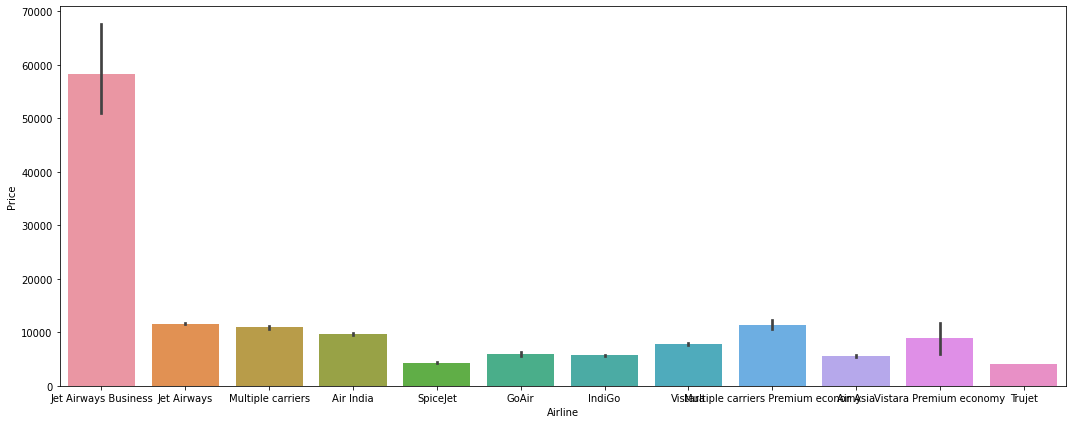

In [139]:
plt.figure(figsize=(15,6))
sns.barplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.tight_layout()

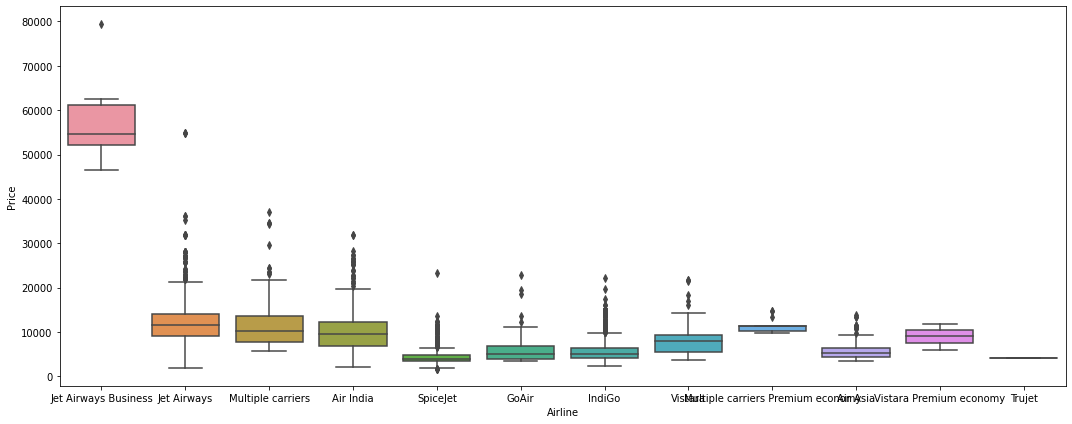

In [140]:
# boxplot of Airline vs Price for statistical analysis
plt.figure(figsize=(15,6))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.tight_layout()

In [141]:
Airline=pd.get_dummies(data['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [142]:
data=pd.concat([data,Airline],axis=1)
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_day_name,Dep_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,Sunday,22,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,Saturday,5,...,0,0,0,0,0,0,0,0,0,0


In [143]:
#dropping the Airline column
data.drop('Airline',axis=1,inplace=True)

In [144]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [145]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [146]:
data=pd.get_dummies(data=data,columns=['Source','Destination','Journey_day_name'],drop_first=True)

In [147]:
data.head(2)

,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day_name_Monday,Journey_day_name_Saturday,Journey_day_name_Sunday,Journey_day_name_Thursday,Journey_day_name_Tuesday,Journey_day_name_Wednesday
0,BLR → DEL,0,3897,24,3,22,20,1,10,2,...,0,0,0,1,0,0,1,0,0,0
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,...,0,0,0,0,0,1,0,0,0,0


In [154]:
# As Route info contains same data of Source,Destination,total stops we can drop it
data.drop('Route',axis=1,inplace=True)

In [155]:
data['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [156]:
data.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day_name_Monday,Journey_day_name_Saturday,Journey_day_name_Sunday,Journey_day_name_Thursday,Journey_day_name_Tuesday,Journey_day_name_Wednesday
Total_Stops,1.000000,0.603897,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.447390,-0.260752,-0.234758,-0.015302,0.006854,0.017762,-0.044154,0.065408,-0.046682,-0.021402
Price,0.603897,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.313417,-0.230755,-0.179223,0.189777,0.055366,-0.014898,0.033837,0.081322,-0.009944,-0.099195
Journey_day,-0.024136,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708,...,0.011489,-0.013391,0.012202,-0.098370,0.172444,0.089392,-0.035477,-0.052858,-0.038799,0.007265
Journey_month,0.065495,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597,...,0.008880,-0.015696,-0.014993,-0.100533,-0.060066,-0.150399,-0.344947,0.127779,0.153417,-0.086845
Dep_hour,-0.061476,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,0.009469,-0.017292,-0.014846,-0.022138,-0.017251,0.003519,-0.021631,-0.002239,0.014871,-0.003819
Dep_min,-0.002618,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,0.003200,0.037705,0.067110,0.107129,0.001882,-0.010089,0.024462,-0.017348,0.025889,-0.017776
Arrival_hour,0.038140,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,-0.030867,-0.033512,-0.014795,0.000366,-0.005578,0.000386,-0.006059,0.006331,-0.013466,0.002411
Arrival_min,-0.106940,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.095250,0.081196,-0.030493,0.021271,-0.021581,-0.020951,0.021960,-0.017779,0.024954,-0.001202
Duration_hours,0.739916,0.508778,-0.037964,0.055552,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.346192,-0.233326,-0.186668,0.004052,-0.011612,0.017619,-0.029983,0.053874,-0.028930,-0.030569
Duration_mins,-0.136706,-0.124855,-0.007708,-0.018597,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.218207,-0.018761,-0.098823,0.079866,-0.023514,0.004073,0.044813,-0.028310,0.008865,0.000915


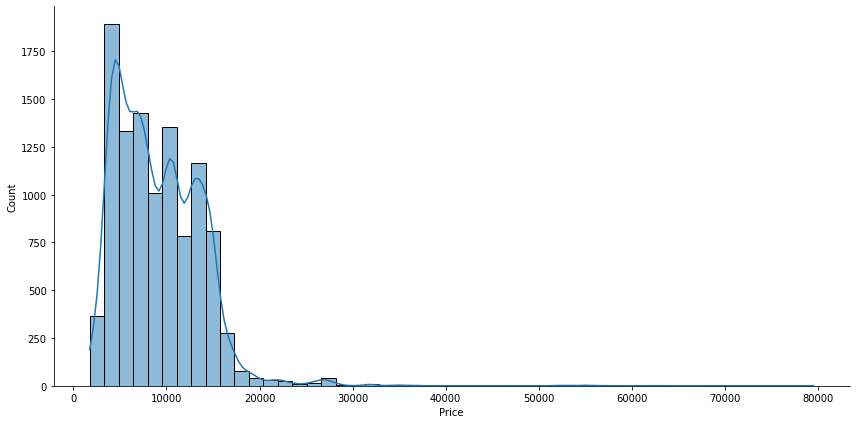

In [157]:
sns.displot(data['Price'],bins=50,aspect=2,height=6,kde=True)

In [158]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day_name_Monday,Journey_day_name_Saturday,Journey_day_name_Sunday,Journey_day_name_Thursday,Journey_day_name_Tuesday,Journey_day_name_Wednesday
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,1,0,0,1,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,1,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,0,0,0,0,1,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,1,0,0,0,1,0,0


In [159]:
# Extracting Variables
X=data.drop('Price',axis=1)
Y = data['Price']

In [160]:
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day_name_Monday,Journey_day_name_Saturday,Journey_day_name_Sunday,Journey_day_name_Thursday,Journey_day_name_Tuesday,Journey_day_name_Wednesday
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,1,0,0,1,0,0,0
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,0,0,1,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,0,0,0,0,1,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,9,19,55,22,25,2,30,0,...,0,0,0,0,0,0,0,0,0,1
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,0,0,0,1,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,1,0,0,0,0,1,0,0,0,0
10681,0,3,1,11,30,14,10,2,40,0,...,0,0,0,1,0,0,0,1,0,0


In [161]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [162]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [163]:
print(selection.feature_importances_)

[2.15545461e-01 8.14011769e-02 4.00690939e-02 2.49362168e-02
 2.13547260e-02 2.99864331e-02 2.09139957e-02 1.45353574e-01
 1.76921099e-02 1.03991827e-02 1.79289684e-03 1.57120144e-02
 1.34880333e-01 6.63381048e-02 1.92969366e-02 9.92745700e-04
 3.06172037e-03 9.05297295e-05 5.30294238e-03 1.34071405e-04
 5.42256205e-04 7.53913901e-03 3.89516253e-03 6.00815958e-03
 1.11580302e-02 1.34907843e-02 6.84830649e-03 5.44934229e-04
 2.26987824e-02 1.31860337e-02 1.45501002e-03 8.32262832e-03
 4.07062411e-02 4.72807164e-03 3.62219454e-03]


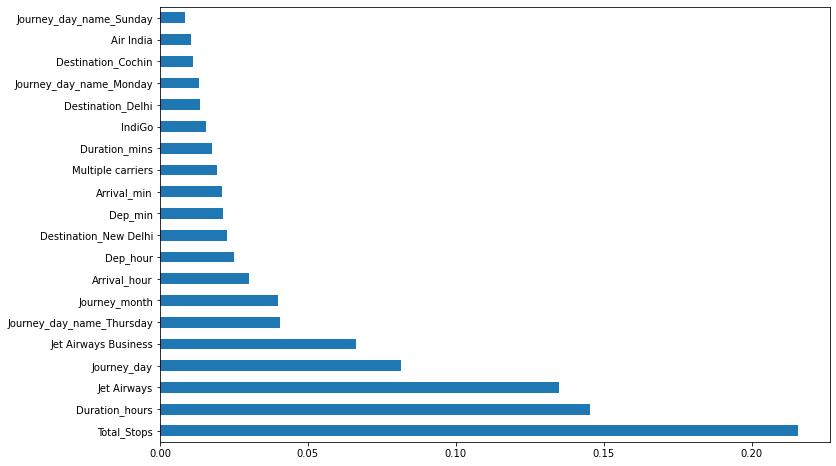

In [164]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

total stops is the most important feature, followed by duration hours and jet-airways .

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [166]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=32)

In [167]:
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.transform(x_test)

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
# creating an instance of the Linear Regression model
linear_reg=LinearRegression()

# fitting the model
linear_reg.fit(x_train,y_train)

LinearRegression()

In [170]:
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  r2_score

In [171]:
pred_train_lr= linear_reg.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= linear_reg.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

2889.740596143207
0.631857182974954
2644.2350172904908
0.6202791798565419


In [173]:
from sklearn.linear_model import Ridge


In [174]:
rr = Ridge(alpha=0.61)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

2889.684817819549
0.6318713947634089
2644.688810044727
0.6201488364175927


In [175]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [176]:
y_pred = rf.predict(x_test)

In [177]:
rf.score(x_train, y_train)

0.9578672361520439

In [178]:
rf.score(x_test, y_test)

0.8042094445612774

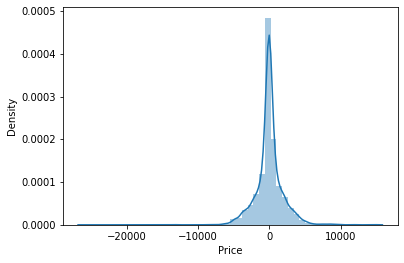

In [179]:
sns.distplot(y_test-y_pred)
plt.show()

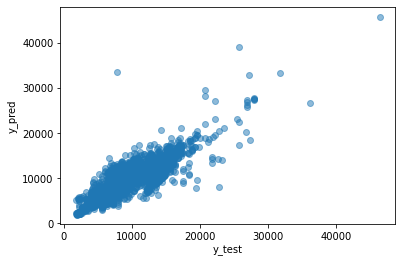

In [180]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [182]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
metrics.r2_score(y_test, y_pred)

MAE: 1195.757019783759
MSE: 3605183.9811453656
RMSE: 1898.7322036415155


0.8042094445612774

In [183]:
from sklearn.model_selection import RandomizedSearchCV

In [184]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [185]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [186]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [187]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [189]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [190]:
prediction = rf_random.predict(x_test)

In [191]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
metrics.r2_score(y_test, prediction)
# adj_R2 = 1- ((1-r2_score) * (n-1)/(n-p-1))
#  n= len(x_train)
# p = i #len(X.columns)


MAE: 1176.1415443721276
MSE: 3165387.7572713406
RMSE: 1779.1536631981344


0.8280939251876425

Metrics Before CV


* MAE: 1198.1222159098506
* MSE: 3685288.33652756
* RMSE: 1919.7104824758237





Metrics After CV

* MAE: 1177.616942860106
* MSE: 3173248.5941268667
* RMSE: 1781.361443987959






In [192]:
# .Implementation of Xgboost 
import xgboost as xgb

In [193]:
xgb_reg=xgb.XGBRegressor()

In [194]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [195]:
xgb_random=RandomizedSearchCV(estimator=xgb_reg,param_distributions=params,cv=5,n_iter=20,scoring=r2_score,verbose=3,n_jobs=-1)

In [196]:
xgb_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[09:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring=<function r2_score at 0x7f68695b9280>, verbose=3)

In [197]:
xgb_random.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [198]:
xgb_reg=xgb.XGBRegressor(min_child_weight=1,
 max_depth=10,
 learning_rate=0.1,
 gamma =0.2,
 colsample_bytree=0.5)

In [199]:
xgb_reg.fit(x_train,y_train)

[09:58:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, gamma=0.2, max_depth=10)

In [201]:
xgb_reg_pred = xgb_reg.predict(x_test)

In [202]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test,xgb_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_reg_pred)))
metrics.r2_score(y_test, xgb_reg_pred)

MAE: 1176.9747559896382
MSE: 3043263.5355329197
RMSE: 1744.4952093751704


0.834726255002636

Comparing two models XGboost with Randomized Search Cv gave better r2_score compared to Random Forest.